In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [14]:
Socia_Media=pd.read_csv('social_media_usage.csv')
Socia_Media

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21
...,...,...,...,...,...,...
995,U_996,LinkedIn,479,4,72,15
996,U_997,Instagram,499,14,110,49
997,U_998,Facebook,318,6,105,9
998,U_999,TikTok,305,15,151,6


In [30]:
SM_usage=pd.read_csv('SMedia_usage.csv')
SM_usage

,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,1,496,0,121,24
1,1,492,3,182,6
2,1,438,11,10,20
3,1,274,10,150,43
4,1,413,2,30,40
...,...,...,...,...,...
995,7,396,20,143,8
996,7,45,8,69,7
997,7,336,17,123,22
998,7,305,18,194,12


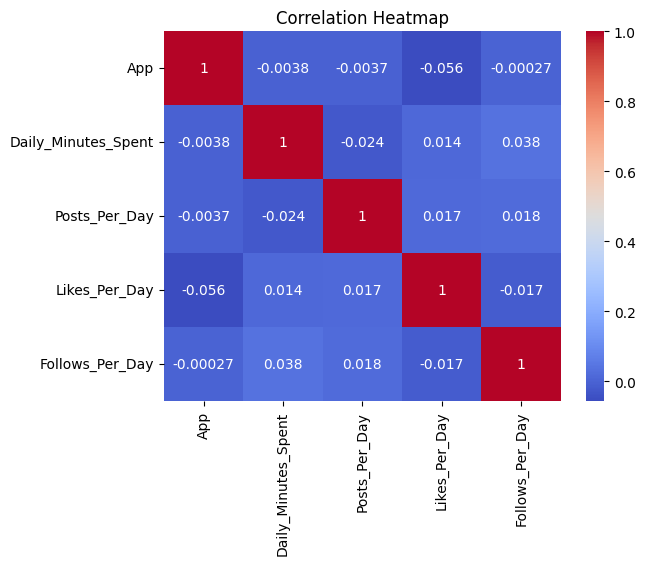

In [16]:


correlation = SM_usage.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
# Define high vs low engagement (you can adjust thresholds)
SM_usage["Engagement_Class"] = pd.cut(
    SM_usage["Likes_Per_Day"],
    bins=[-1, 50, 200, float("inf")], 
    labels=["Low", "Medium", "High"]
)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features & Target
X = SM_usage.drop(columns=["Likes_Per_Day", "Engagement_Class", "App"]) 
y = SM_usage["Engagement_Class"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         Low       0.32      0.12      0.17        50
      Medium       0.76      0.91      0.83       150

    accuracy                           0.71       200
   macro avg       0.54      0.52      0.50       200
weighted avg       0.65      0.71      0.66       200

[[  6  44]
 [ 13 137]]


In [19]:
SM_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   App                  1000 non-null   int64   
 1   Daily_Minutes_Spent  1000 non-null   int64   
 2   Posts_Per_Day        1000 non-null   int64   
 3   Likes_Per_Day        1000 non-null   int64   
 4   Follows_Per_Day      1000 non-null   int64   
 5   Engagement_Class     1000 non-null   category
dtypes: category(1), int64(5)
memory usage: 40.3 KB


Active Users

In [ ]:
SM_usage=SM_usage.drop(columns="App_Name",axis=1)

In [21]:
X = SM_usage.drop('Posts_Per_Day', axis=1)
y = SM_usage['Posts_Per_Day']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
SM_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   App                  1000 non-null   int64   
 1   Daily_Minutes_Spent  1000 non-null   int64   
 2   Posts_Per_Day        1000 non-null   int64   
 3   Likes_Per_Day        1000 non-null   int64   
 4   Follows_Per_Day      1000 non-null   int64   
 5   Engagement_Class     1000 non-null   category
dtypes: category(1), int64(5)
memory usage: 40.3 KB


In [24]:
SM_usage=SM_usage.drop(columns="Engagement_Class",axis=1)

In [25]:


X = SM_usage.drop('Posts_Per_Day', axis=1)
y = SM_usage['Posts_Per_Day']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)# Define and train model
xgb_model = XGBRegressor(
    n_estimators=200,     # number of trees
    learning_rate=0.1,    # step size shrinkage
    max_depth=6,          # tree depth
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)



Mean Absolute Error (MAE): 5.638568878173828


In [26]:
X = SM_usage.drop('Follows_Per_Day', axis=1)
y = SM_usage['Follows_Per_Day']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)# Define and train model
xgb_model = XGBRegressor(
    n_estimators=200,     # number of trees
    learning_rate=0.1,    # step size shrinkage
    max_depth=6,          # tree depth
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 13.837868690490723


In [27]:
X = SM_usage.drop('Daily_Minutes_Spent', axis=1)
y = SM_usage['Daily_Minutes_Spent']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)# Define and train model
xgb_model = XGBRegressor(
    n_estimators=200,     # number of trees
    learning_rate=0.1,    # step size shrinkage
    max_depth=6,          # tree depth
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 141.45172119140625


In [ ]:


# Example mapping (replace with your actual names if needed)
#app_mapping = {
    1: "Facebook",
    2: "Instagram",
    3: "Twitter",
    4: "Pinterest",
    5: "Snapchat",
    6: "TikTok",
    7: "LinkedIn"
#}
SM_usage["App_Name"] = SM_usage["App"].map(app_mapping)

# Aggregate activity by App
app_activity = SM_usage.groupby("App_Name")[["Posts_Per_Day", "Follows_Per_Day"]].sum()

# Create Activity Score = Posts + Follows
app_activity["Activity_Score"] = app_activity["Posts_Per_Day"] + app_activity["Follows_Per_Day"]

# Sort by Activity Score
app_activity = app_activity.sort_values(by="Activity_Score", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=app_activity["Activity_Score"], y=app_activity.index, palette="Set2")
plt.title("Top Active Apps (Based on Posts + Follows)")
plt.xlabel("Total Activity Score (Posts + Follows)")
plt.ylabel("App")
plt.show()


IndentationError: unexpected indent (4032271273.py, line 3)

average post per day

C:\Users\FAST COMPUTER\AppData\Local\Temp\ipykernel_6204\2995060779.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="App_Name", y="Posts_Per_Day", data=SM_usage,estimator="mean" ,palette="Set2")


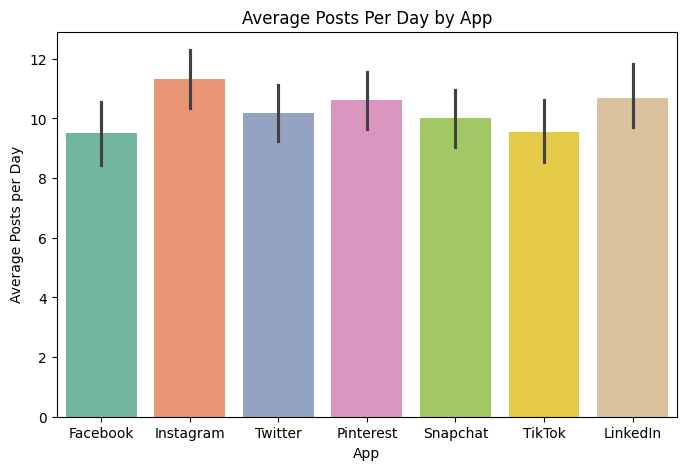

In [ ]:

app_mapping = {
    1: "Facebook",
    2: "Instagram",
    3: "Twitter",
    4: "Pinterest",
    5: "Snapchat",
    6: "TikTok",
    7: "LinkedIn"
}

SM_usage["App_Name"] = SM_usage["App"].map(app_mapping)

# Now plot with names


plt.figure(figsize=(8,5))
sns.barplot(x="App_Name", y="Posts_Per_Day", data=SM_usage,estimator="mean" ,palette="Set2")

plt.title("Average Posts Per Day by App")
plt.xlabel("App")
plt.ylabel("Average Posts per Day")

plt.show()

C:\Users\FAST COMPUTER\AppData\Local\Temp\ipykernel_14716\2545173494.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="App_Name", y="Follows_Per_Day", data=SM_usage,estimator="mean" ,palette="Set2")


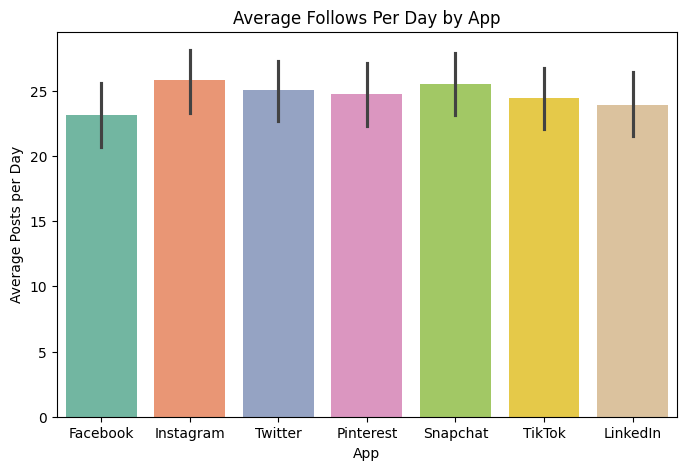

In [31]:
app_mapping = {
    1: "Facebook",
    2: "Instagram",
    3: "Twitter",
    4: "Pinterest",
    5: "Snapchat",
    6: "TikTok",
    7: "LinkedIn"
}

SM_usage["App_Name"] = SM_usage["App"].map(app_mapping)

# Now plot with names


plt.figure(figsize=(8,5))
sns.barplot(x="App_Name", y="Follows_Per_Day", data=SM_usage,estimator="mean" ,palette="Set2")

plt.title("Average Follows Per Day by App")
plt.xlabel("App")
plt.ylabel("Average Posts per Day")

plt.show()

average likes per day

C:\Users\FAST COMPUTER\AppData\Local\Temp\ipykernel_6204\3039702882.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="App_Name", y="Likes_Per_Day", data=SM_usage, estimator="mean", palette="Set2")


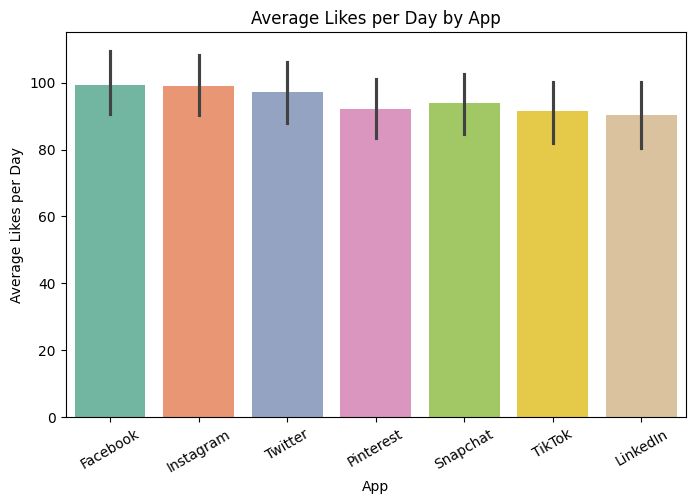

In [ ]:
# Example mapping dictionary
app_mapping = {
    1: "Facebook",
    2: "Instagram",
    3: "Twitter",
    4: "Pinterest",
    5: "Snapchat",
    6: "TikTok",
    7: "LinkedIn"
}

# Apply mapping
SM_usage["App_Name"] = SM_usage["App"].map(app_mapping)

# Now plot with names


plt.figure(figsize=(8,5))
sns.barplot(x="App_Name", y="Likes_Per_Day", data=SM_usage, estimator="mean", palette="Set2")

plt.title("Average Likes per Day by App")
plt.xlabel("App")
plt.ylabel("Average Likes per Day")
plt.xticks(rotation=30)
plt.show()

Retention of users

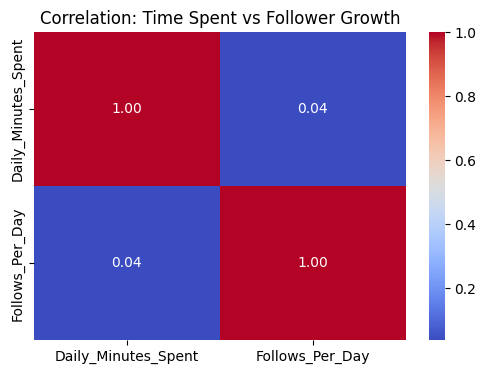

In [ ]:


# Correlation between time spent and follower growth
correlation = SM_usage[["Daily_Minutes_Spent", "Follows_Per_Day"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Time Spent vs Follower Growth")
plt.show()


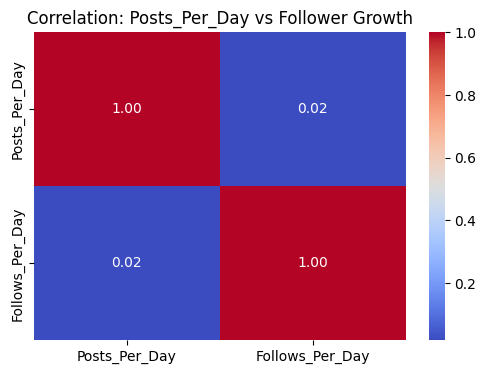

In [ ]:
# Correlation between post per day and follower growth
correlation = SM_usage[["Posts_Per_Day", "Follows_Per_Day"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Posts_Per_Day vs Follower Growth")
plt.show()